# Imports

Begin by importing the required libraries.

In [1]:
! virtualenv venv
! powershell .\start.ps1

created virtual environment CPython3.10.6.final.0-64 in 5245ms
  creator CPython3Windows(dest=C:\Users\juinl\Documents\GitHub\Analysis-of-Algorithms\Dijkstra Shortest Path Search\venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\juinl\AppData\Local\pypa\virtualenv)
    added seed packages: Pillow==9.2.0, contourpy==1.0.5, cycler==0.11.0, fonttools==4.37.4, kiwisolver==1.4.4, matplotlib==3.6.1, numpy==1.23.3, packaging==21.3, pandas==1.5.0, pip==22.2.2, pyparsing==3.0.9, python_dateutil==2.8.2, pytz==2022.4, seaborn==0.12.0, setuptools==65.3.0, six==1.16.0, wheel==0.37.1
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Import the generated dataset.

In [54]:
A = pd.read_csv("./datasets/PartA.csv", header=0)
B = pd.read_csv("./datasets/PartB.csv", header=0)

# Defining Parameters

In our empirical analysis on Dijkstra's Shortest Path Search Algorithm, the following defines the parameters used:
* Graph type: *G(V, E)* where *G* is a **directed graph** which ranges from **sparsely connected** to **strongly connected**.
* Number of vertices, *V* ranges from **100 to 2500**.
* Total number of edges, *E* ranges from (2 to *V*, in multiples of 2) * *V*.
* Each vertex will have 1 to *V* edges. The number of edges each vertex has is consistent, i.e. a graph where a vertex has 5 edges guarantees that all other vertex has 5 edges.



# Part A

We plot the number of key comparisons against number of vertices, for Shortest Path Search Algorithm applied on adjacency matrix and using array-based priority queue.

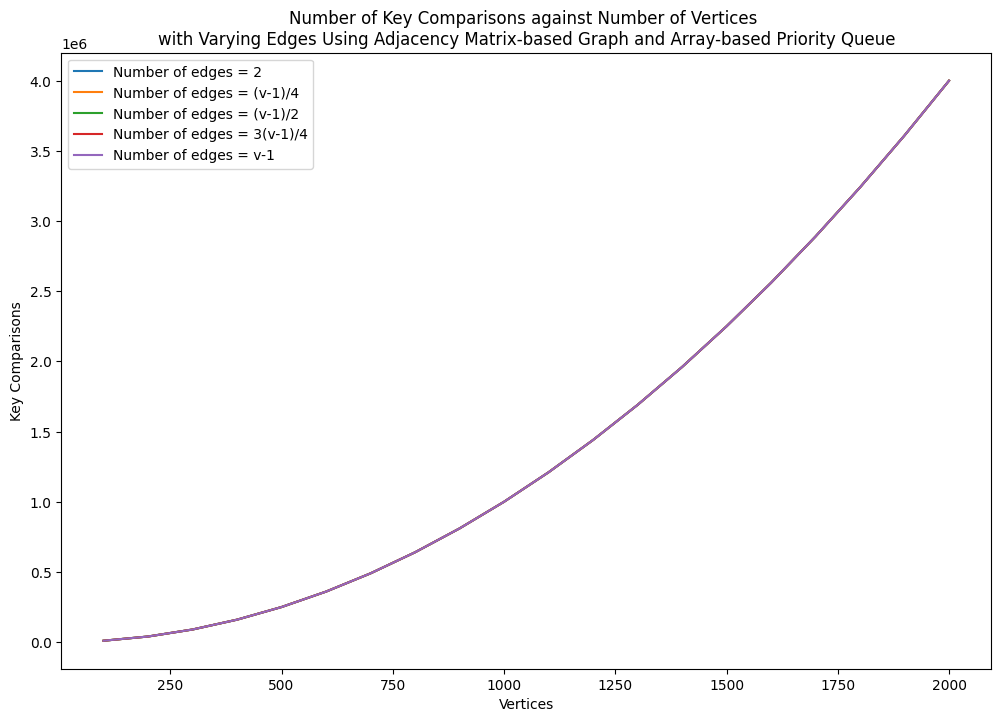

In [47]:
verticesMegaList = [[],[],[],[],[]]
keyCompMegaList = [[],[],[],[],[]]

count = 0
for index, row in A.iterrows():
    keyCompMegaList[count].append(int(row["Key Comparisons"]))
    verticesMegaList[count].append(int(row["Vertices"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(keyCompMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Key Comparisons"] = keyCompMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Key Comparisons", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Number of Key Comparisons against Number of Vertices \nwith Varying Edges Using Adjacency Matrix-based Graph and Array-based Priority Queue")



We plot the elapsed time against number of vertices, for Shortest Path Search Algorithm applied on adjacency matrix and using array-based priority queue.

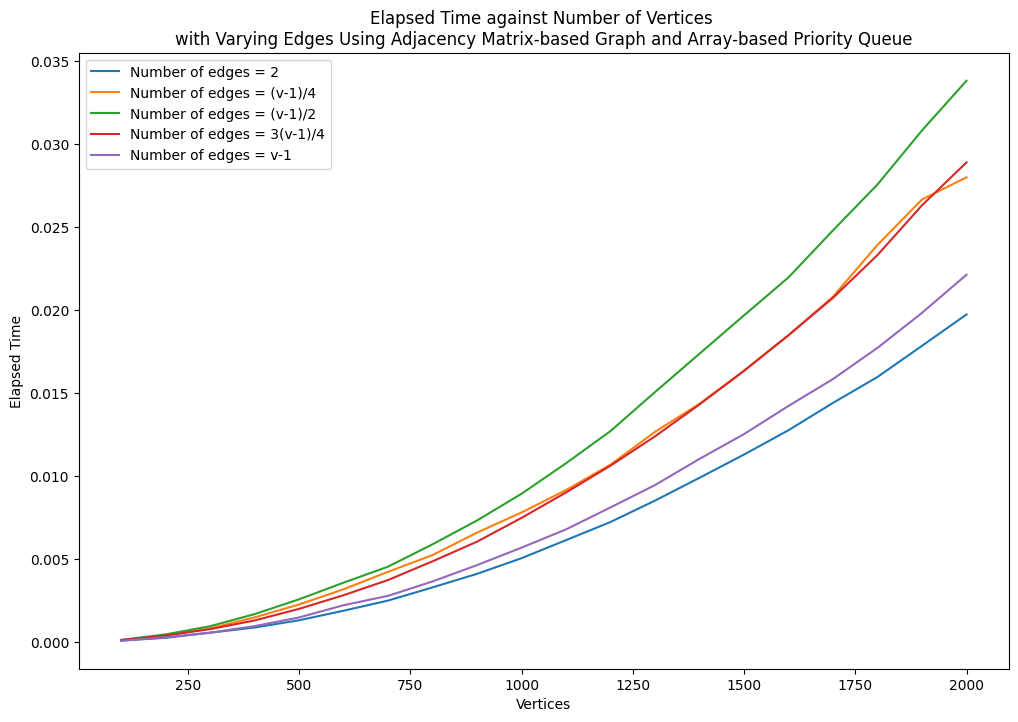

In [48]:
timeMegaList = [[],[],[],[],[]]

count = 0
for index, row in A.iterrows():
    timeMegaList[count].append(float(row["Elapsed Time"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Elapsed Time against Number of Vertices \nwith Varying Edges Using Adjacency Matrix-based Graph and Array-based Priority Queue")



### Theoretical Analysis

We expect the Dijkstra's Shortes Path Search algorithm to have a time complexity of ***O(|V|<sup>2</sup>)***.

**Derivations:**
* Since we are working with **directed** and **connected** graph, we guarantee to visit all nodes. This incurs a search cost of ***O(|V|)***.
* On each iteration, we expand the vertex with smallest distance from start vertex. We find this vertex by traversing through the `dist[]` array and find the minimum. This incurs a search cost of ***O(|V|)***.
* On each iteration, we check if the other vertices are connected to it. This incurs a search cost of ***O(|V| - 1)***.

Thus, the time complexity of DIjkstra's Shortest Path Search algorithm has a time complexity of ***O(|V|)*** x (***O(|V|)*** + ***O(|V| - 1)***) = ***O(|V|<sup>2</sup>)***.



**Note on Key Comparisons:**
* The number of key comparisons for a graph with size *|V|* vertices has the same number of key comparisons regardless of how many egdes each vertex has. This is because a comparison is done to determine if the vertex is connected or not, and so we have to check for *|V| - 1* vertices for every vertex.

* Thus, to truly see the effect of number of edges on the complexity of Dijkstra's algorithm, it is much more appropriate to look at elapsed time as it takes into account the time to compare distance and update distance. (More connected edges means more comparing and updating is done)


# Part B

We plot the number of key comparisons against number of vertices, for Shortest Path Search Algorithm applied on adjacency list and using min heap priority queue.

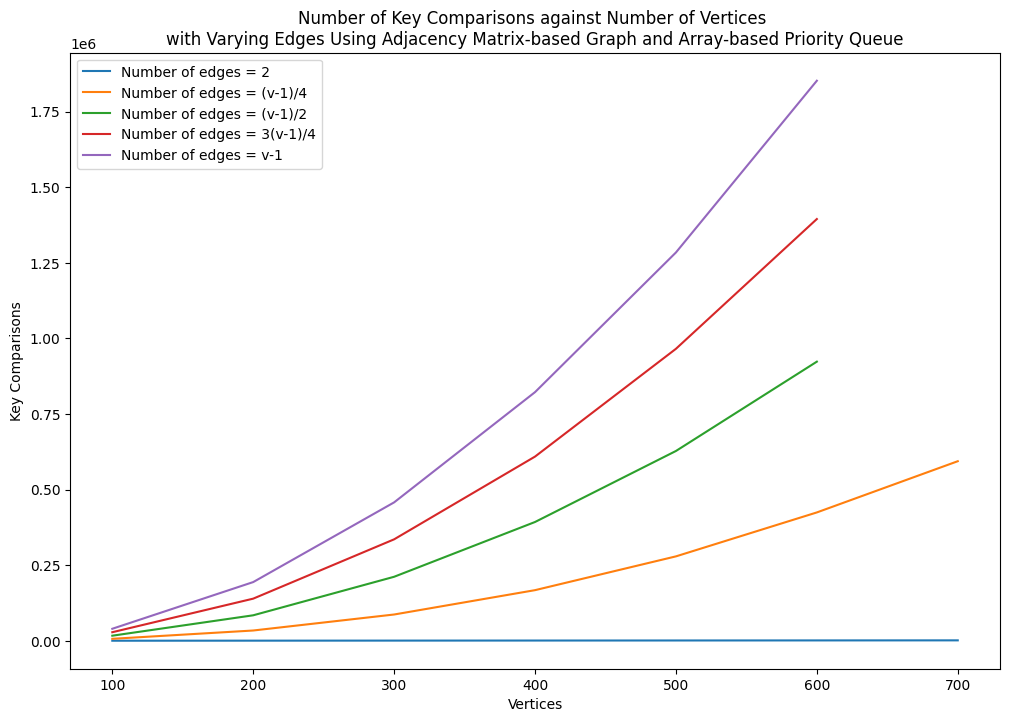

In [58]:
verticesMegaList = [[],[],[],[],[]]
keyCompMegaList = [[],[],[],[],[]]

count = 0
for index, row in B.iterrows():
    keyCompMegaList[count].append(int(row["Key Comparisons"]))
    verticesMegaList[count].append(int(row["Vertices"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(keyCompMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Key Comparisons"] = keyCompMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Key Comparisons", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Number of Key Comparisons against Number of Vertices \nwith Varying Edges Using Adjacency List-based Graph and Min Heap Priority Queue")

We plot the elapsed time against number of vertices, for Shortest Path Search Algorithm applied on adjacency list and using min heap priority queue.

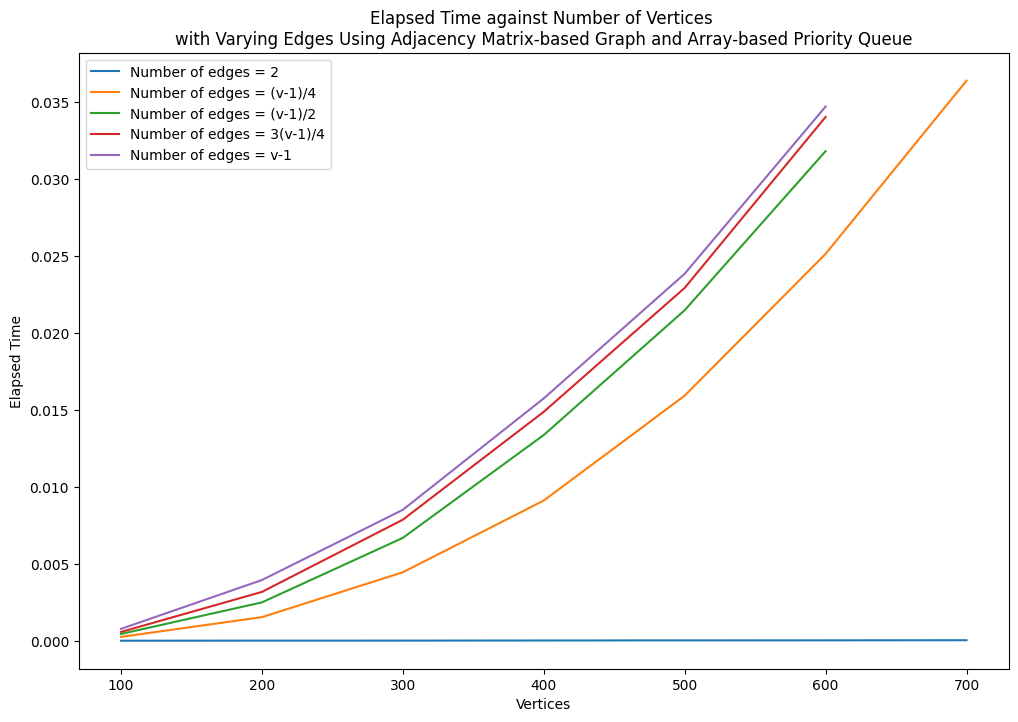

In [59]:
timeMegaList = [[],[],[],[],[]]

count = 0
for index, row in B.iterrows():
    timeMegaList[count].append(float(row["Elapsed Time"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Elapsed Time against Number of Vertices \nwith Varying Edges Using Adjacency List-based Graph and Min Heap Priority Queue")

